<a href="https://colab.research.google.com/github/ashkanyousefi/Springboard/blob/master/Capstone_1_Total_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Capstone 1 Data Wrangling


This is the second step in the Data Science Method. We introduced this topic in the last subunit. With a clear problem identification completed we can progress on to the second step of Data Wrangling, this consists of multiple components including; Data Collection, Data Organization, Data Definitions, and Data Cleaning.  



**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





## Data Collection

First we load the needed packages and modules into python. Then we will load the data into a pandas data frame for ease of use.

In [0]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Now, we need to prepare to load the csv file of our data. You may need to change your path to the location where you saved the csv file on your local machine or you need to save both the csv and the notebook to your working project directory. 
Start by printing the current directory.

**<font color='teal'> Print the current working directory </font>**

In [0]:
os.getcwd()

'/content'

**<font color='teal'> Print the files in your current directory to make sure the 'updated_ski_data.csv' is present. </font>**

In [0]:
os.listdir()

['.config', 'sample_data']

<font color='teal'> **If you need to change your working directory by defining the path in the next cell.~ make sure to uncomment the code before running the cell, if your path is fine just go on to the Load the data step.**</font>

In [0]:
path=os.getcwd()
#os.chdir(path) 

### Load data from csv file
Now we are ready to read our data into a pandas dataframe. In this exercise this will complete the data collection step as all the data we need for our project are contained in this one csv file.
*Double check your path is correct, and between the `file` name and the `path` you have the full location of your `updated_ski_data.csv`

<font color='teal'> **Load the data into a pandas dataframe and print the first five rows of the dataframe.**</font>

In [0]:
df=pd.read_csv('https://springboardash.s3.amazonaws.com/ski_data.csv')
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [0]:
df.shape

(330, 27)

## Data Organization

Data organization in this project is going to be completed through a basic project folder structure we create. As you read in the Medium article introducing the data wrangling step often this is completed using Github or a module such as cookiecutter. Now that we have our data and our notebook pointed our working project directory let's start by printing the current file location, then we will create a few subfolders to keep our project organized.

<font color='teal'> **Finish the statement below by assigning the path variable **</font>

In [0]:
print ("The current working directory is %s" % path)

The current working directory is /content


### Create subfolders in project directory

Now, let's create some subfolders inside our Project folder.

<font color='teal'> **Create a subfolder called `data`.**</font>

In [0]:
# define the name of the directory to be created
newfolder = "data"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Successfully created the directory data 


<font color='teal'> **Create a folder for the data visualizations you will create in future steps called `figures`.**</font>

In [0]:
# define the name of the directory to be created
newfolder = "figures"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Successfully created the directory figures 


<font color='teal'> **Create a folder for the models you save, called `models`.**</font>

In [0]:
# define the name of the directory to be created
newfolder = "models"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Successfully created the directory models 


<font color='teal'> **Print the contents of your project folder to confirm you created the additional folders in your directory.**</font>

In [0]:
os.listdir()

['.config', 'models', 'content', 'figures', 'sample_data']

## Data Definition
Review Column Names, Data Types, and null values.

### Column Names 
<font color='teal'> **Print the columns names of the entire dataframe**</font>

In [0]:
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


### Data Types 
Review which columns are integer, float, categorical, or dates. Make sure the data type loaded properly in the dataframe. 

<font color='teal'> **Using the `df.dtypes` function print the variable names and associated datatypes.**</font>

In [0]:
# df.head()
df.dtypes
df_dtypes=pd.DataFrame(df.dtypes)

In [0]:
vo = pd.DataFrame(df.dtypes).reset_index()
vo.columns = ['VarName', 'DType']
vo.head(3)

,VarName,DType
0,Name,object
1,Region,object
2,state,object


<font color='teal'> **The `df.info()` function also prints the count of non-null values per column. Use this function to review the column names, null value counts and data types of your data frame.**</font>

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

Some of these column names are easy to understand but others are not as clear. We have a metadata file with information about each column to help us understand what the column names refer to. Let's review the metadata table below for more information about each column.

Descriptions of Columns

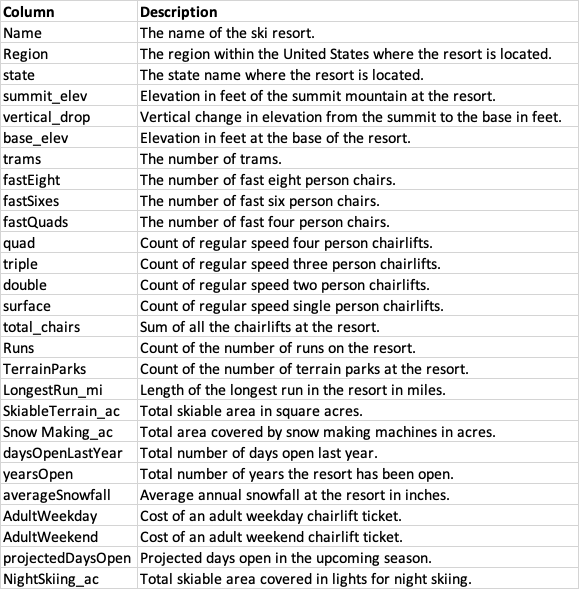

There are some null or missing values we will need to mitgate in a later step. However, let's also look at the counts of unique values or codes per column first.

### Count of unique values or codes
<font color='teal'> **Print the count of unique values for every column regardless of data type.**</font>

In [0]:
df.nunique()

Name                 329
Region                38
state                 35
summit_elev          266
vertical_drop        193
base_elev            244
trams                  5
fastEight              2
fastSixes              7
fastQuads             14
quad                   7
triple                 9
double                10
surface               12
total_chairs          31
Runs                 110
TerrainParks          11
LongestRun_mi         42
SkiableTerrain_ac    193
Snow Making_ac       143
daysOpenLastYear     111
yearsOpen             72
averageSnowfall      107
AdultWeekday          83
AdultWeekend          81
projectedDaysOpen     90
NightSkiing_ac        78
dtype: int64

<font color='teal'> **Print the percent of unique values per column.Use the `df.nunique` and the size of the dataframe to calculate the percentages.**</font>

In [0]:
print(df.nunique()/df.shape[0])

Name                 0.996970
Region               0.115152
state                0.106061
summit_elev          0.806061
vertical_drop        0.584848
base_elev            0.739394
trams                0.015152
fastEight            0.006061
fastSixes            0.021212
fastQuads            0.042424
quad                 0.021212
triple               0.027273
double               0.030303
surface              0.036364
total_chairs         0.093939
Runs                 0.333333
TerrainParks         0.033333
LongestRun_mi        0.127273
SkiableTerrain_ac    0.584848
Snow Making_ac       0.433333
daysOpenLastYear     0.336364
yearsOpen            0.218182
averageSnowfall      0.324242
AdultWeekday         0.251515
AdultWeekend         0.245455
projectedDaysOpen    0.272727
NightSkiing_ac       0.236364
dtype: float64


For categorical columns it is much more helpful to know what the unique codes are. <font color='teal'> **For example, if we look at the `Region` or `state` column, let's print out the different states in the data frame.**</font>

In [0]:
df.state.value_counts()

New York          33
Michigan          29
Colorado          22
California        21
Pennsylvania      19
Wisconsin         16
New Hampshire     16
Vermont           15
Minnesota         14
Utah              13
Idaho             12
Montana           12
Massachusetts     11
Oregon            10
Washington        10
Maine              9
New Mexico         9
Wyoming            8
North Carolina     6
Ohio               5
Connecticut        5
Nevada             4
West Virginia      4
Illinois           4
Virginia           4
Iowa               3
Alaska             3
South Dakota       2
Arizona            2
Missouri           2
Indiana            2
New Jersey         2
Tennessee          1
Rhode Island       1
Maryland           1
Name: state, dtype: int64

### Range of values per column

<font color='teal'>**Print the minimum and maximum values of each column using the aggregate function.**</font>

In [0]:
df.agg([min, max]).T

,min,max
Name,49 Degrees North,Yosemite Ski & Snowboard Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,315,13487
vertical_drop,60,4425
base_elev,70,10800
trams,0,4
fastEight,0,1
fastSixes,0,6
fastQuads,0,15


<font color='teal'> **Review the numeric data sets summary statistics.**</font>

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


## Data Cleaning

### Handle the missing and NA values
Run the code below to print out the percent of each feature that is missing. You can see from the result of the code that, there are 13 columns out of 27 missing data. Although, most of these are missing less than 10% of the data. You may need to adapt the code if your dataframe is named something other than df.


*   Consider the columns individually 
*   Identify the appropriate fill method for each column



In [0]:
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [0]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


Let's review what each of these columns in the data are.


*   fastEight is the number of fast eight person ski lifts at each of the resorts. In addition we have the counts of all the other types of chairs at each resort and the total number of chairs as well. We can simply subtract the number of fastEight lifts from the total to determine if any of this missing values can be backfilled or should be equal to zero. Follow the next step below and see for yourself how to review and backfill these missing values.These columns contain all the resort lift counts by type.


* trams	
* fastEight	
* fastSixes	
* fastQuads	
* quad
* triple	
* double	
* surface	
* total_chairs <- the sum of these columns for each row.




<font color='teal'> **In order to determine what an appropriat efill value for the fastEigth column, we need to calculate the difference between the sum of all the chairlift columns and the `total_chairs` column.**</font>

In [0]:
sum_ch=df[['trams','fastEight','fastSixes','fastQuads','quad','triple','double','surface']].sum(axis =1)-df['total_chairs']
sum_ch.value_counts()

0.0    330
dtype: int64

As you can see from running the above cell there are no fastEight lifts values missing because the difference between the sum of all the lift columns and the 'total_chairs' column is zero for every row in the dataframe. This confirms that we can therefore replace the missing values for the fastEight rows with zeros.

<font color='teal'> **In the cell below to replace Nan's in 'fastEight' with zero.**</font>

In [0]:
df['fastEight'].fillna(0, inplace=True)

In [0]:
df.shape

(330, 27)

Now, let us consider the next column with missing values 'NightSkiing_ac', this column is the number of acres of night skiing availble at the given resort. Not all resorts have night skiing because it requires stadium lights and is not that popular with skiers and snowboarders. Given that information it is also safe to assume that if there are missing values in this column it is due to their not being any night skiing acres available at that resort so we can fill missing values with zeros safely. 

Next, let's consider the ticket price columns 'AdultWeekday' & 'AdultWeekend' we know there has to be a price for these that happens to missing so in this case we can not fill the missing values with zeros. Instead we have a few options about what value we use to fill the missing rows. We can simply take the mean of the column in consideration or we could backfill or forwardfill from the resort in the row before or after our missing value. Backfill and forward fill would be more reasonable in a situation where the data are in a particular order where the rows near eachother are similar to each other in the price column. We could also build an imputation model to use a model to predict the value based on the data values in adjacent columns as well as adjacent rows. 

<font color='teal'> **Run the cell below to replace Nan's in 'AdultWeekday' with the mean value.**</font>

<font color='teal'> **Use what you know about the remaining columns missing data and decide whether to fill with a zero or to fill with a mean.**</font>


In [0]:
df['AdultWeekday'].fillna((df['AdultWeekday'].mean()), inplace=True)
df['NightSkiing_ac'].fillna(0, inplace=True)
df['TerrainParks'].fillna(0, inplace=True)
df['Snow Making_ac'].fillna(0, inplace=True)
df['AdultWeekend'].fillna((df['AdultWeekend'].mean()), inplace=True)
df['daysOpenLastYear'].fillna((df['daysOpenLastYear'].mean()), inplace=True)
df['projectedDaysOpen'].fillna((df['projectedDaysOpen'].mean()), inplace=True)
df['averageSnowfall'].fillna((df['averageSnowfall'].mean()), inplace=True)
df['LongestRun_mi'].fillna((df['LongestRun_mi'].mean()), inplace=True)
df['Runs'].fillna((df['Runs'].mean()), inplace=True)
df['SkiableTerrain_ac'].fillna((df['SkiableTerrain_ac'].mean()), inplace=True)
df['yearsOpen'].fillna((df['yearsOpen'].mean()), inplace=True)

### Look for duplicate rows
Run the code below to print out the duplicated rows.You can see there are no duplicate rows, so in this particular case there is nothing else to do related to duplicate rows. We will review duplicate or synonymous columns in Step 3 of the Guided Capstone.

In [0]:
duplicateRowsDF = df[df.duplicated()]

#
duplicateRowsDF

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


In [0]:
df.shape

(330, 27)

## Export data to a new csv file 
In order to bring the changes we made here into the next notebook we are going to write out the updated data frame to a new csv file.

In [0]:
os.getcwd()

'/content'

![alt text](https://)<font color='teal'> **Export the processed dataframe as a csv file to the data folder we created earlier. Name this new csv file `step2_output.csv` and set the paramter, index=False.**</font>

In [0]:
df.to_csv('./data/step2_output.csv',index=False)

### Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 


  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [0]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


**<font color='teal'> If you need to change your path refer back to step 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [0]:
os.listdir()

['.config',
 'step2_output.csv',
 'models',
 'data',
 'content',
 'figures',
 'sample_data']

In [0]:
file='./data/step2_output.csv'
df=pd.read_csv(file)
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [0]:
df.shape

(330, 27)

### Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

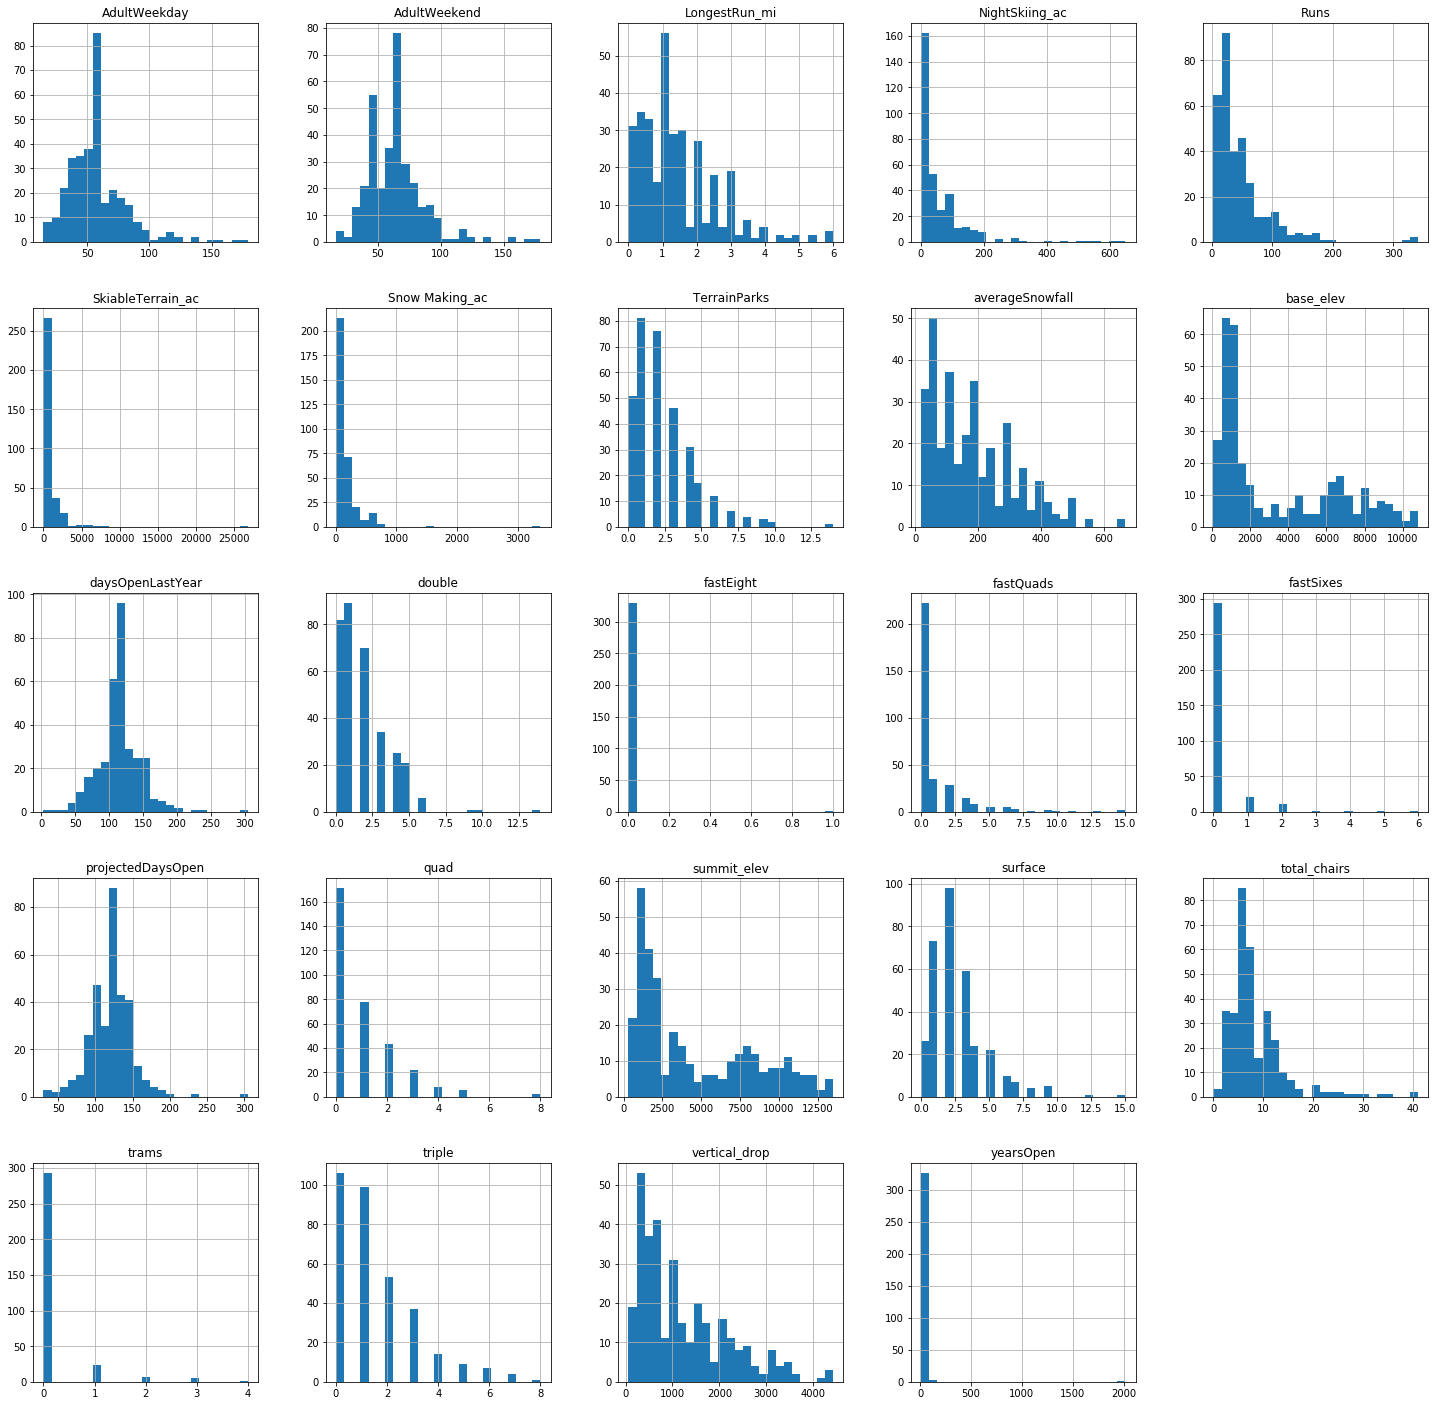

In [0]:
hist = df.hist(bins=25,figsize =(25,25))

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

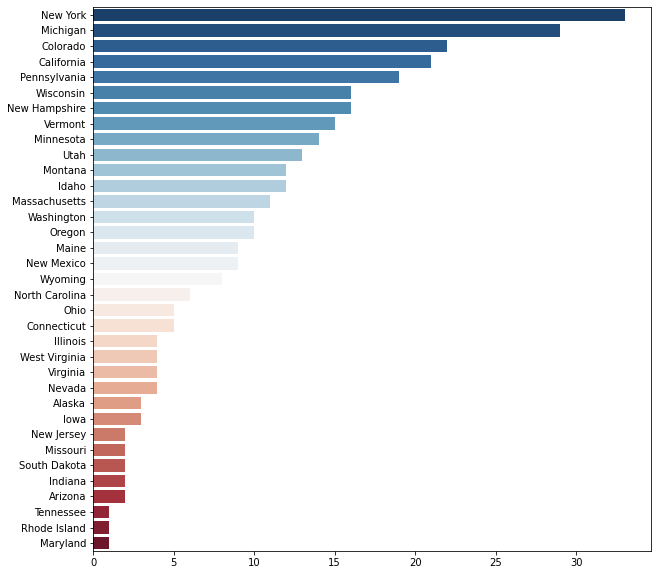

In [0]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.state.value_counts())
names = list(x.index)
values = list(x.state)
sns.barplot(x=values, y=names, palette="RdBu_r")

In [0]:
mydata=pd.DataFrame(df.state.value_counts())
mydata

,state
New York,33
Michigan,29
Colorado,22
California,21
Pennsylvania,19
Wisconsin,16
New Hampshire,16
Vermont,15
Minnesota,14
Utah,13


**<font color='teal'>Region Levels Plot</font>**

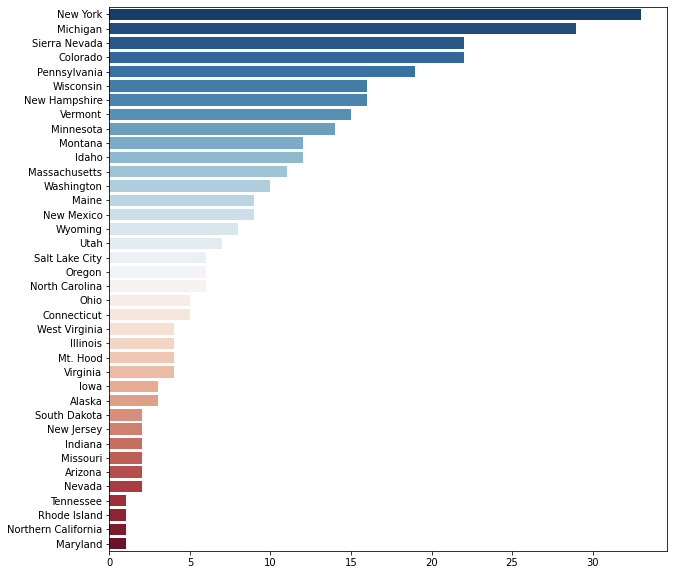

In [0]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.Region.value_counts())
names = list(x.index)
values = list(x.Region)
sns.barplot(x=values, y=names, palette="RdBu_r")

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therefore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [0]:
df=df.drop(['Region'],axis=1)
df.columns


Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')

## Anamolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

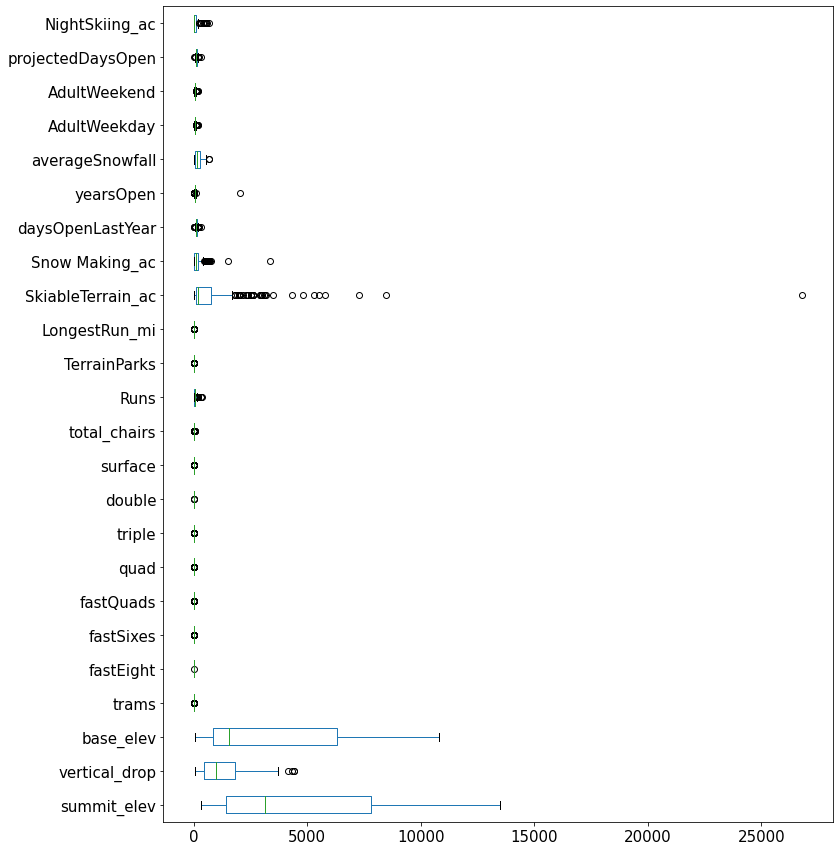

In [0]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

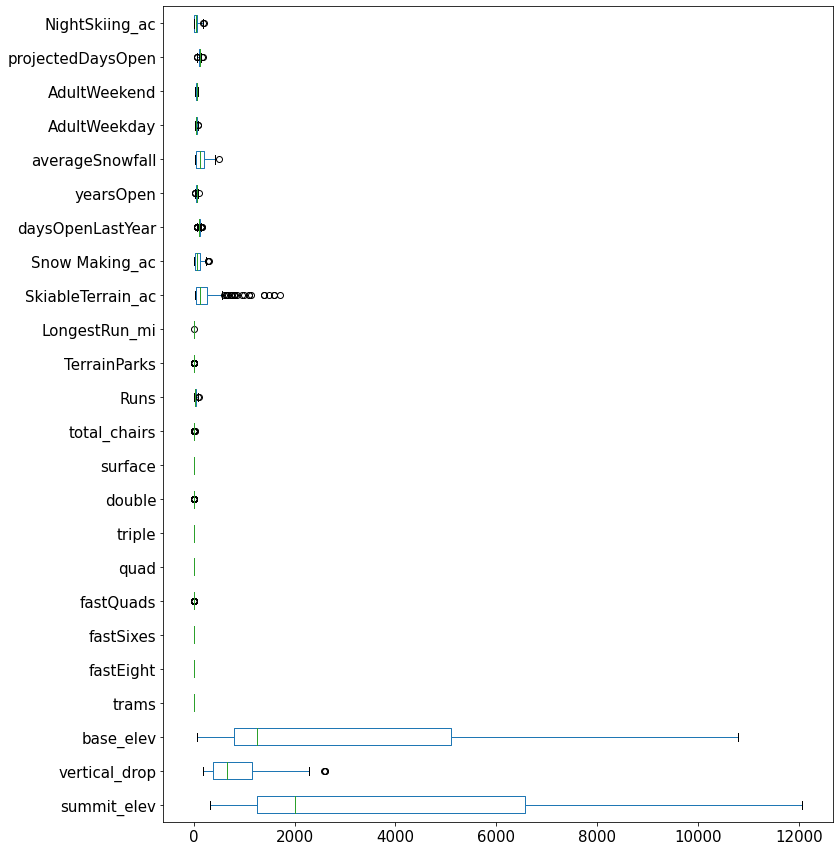

In [0]:
#Remove outliers based on IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
boxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [0]:
print(df.shape)
dfno.shape

(330, 26)


(176, 26)

There are many ways to discover and remove outliers, and what counts as a sensible way of doing so depends on your problem, your methodology for solving that problem, and the nature of your data. 

Each method will have its merits and demerits. As we can see, in this instance, we've lost a great many observations! 

There is no hard and fast rule as to which outlier removal method is best in all cases, and you will have to exercise your good judgement in arriving at an appropriate method for your problem at hand. We will cover outlier removal in more depth in sections 7 (Data Wrangling) and 10 (Statistics for Exploratory Data Analysis) of the course. 

There are many possible response variables you could have identified in the Step 1 guided capstone exercise. However, for the rest of this guided capstone project we will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, we need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

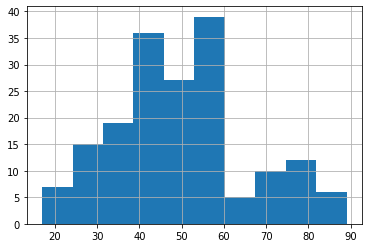

In [0]:
dfno['AdultWeekday'].hist()

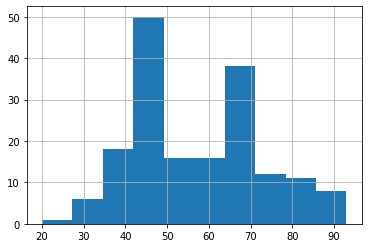

In [0]:
dfno['AdultWeekend'].hist()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

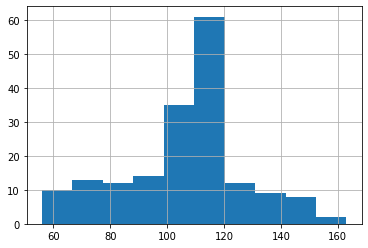

In [0]:
dfno['daysOpenLastYear'].hist()

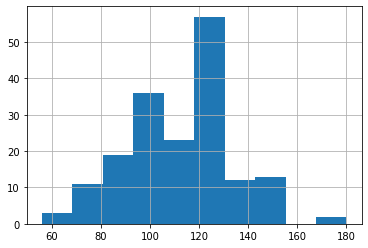

In [0]:
dfno['projectedDaysOpen'].hist()

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

## Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

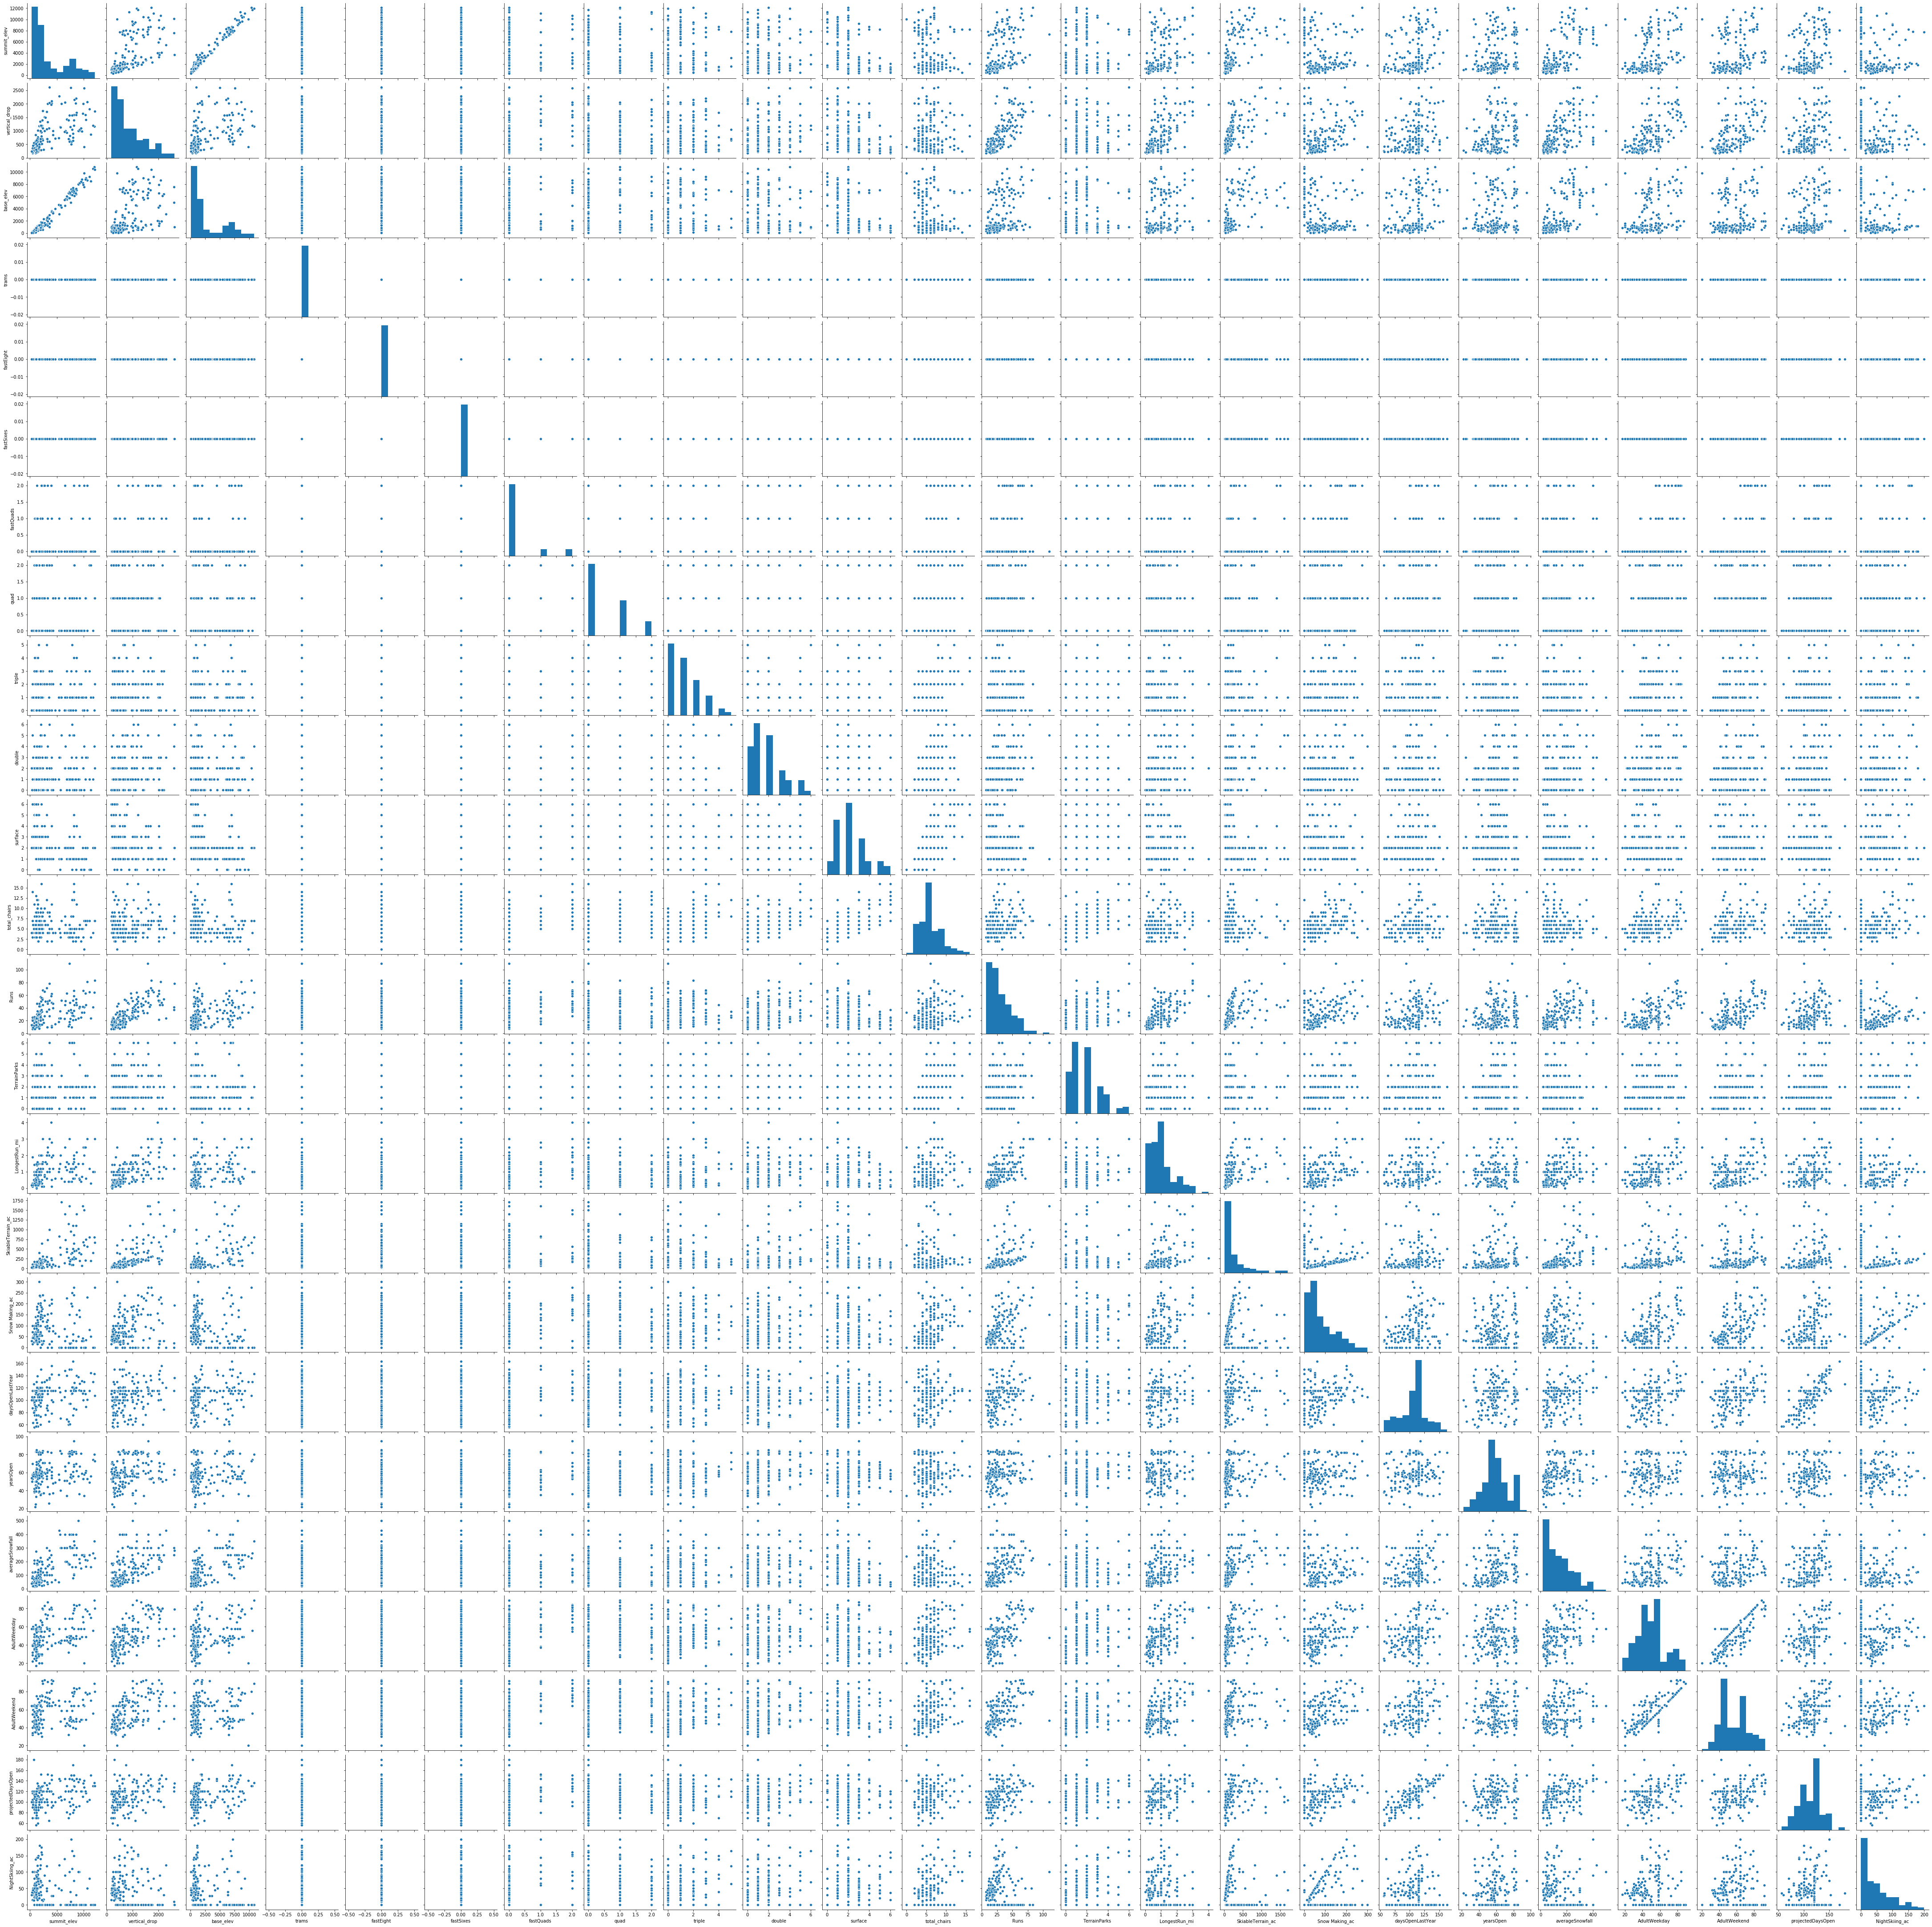

In [0]:
#pair plots
g = sns.pairplot(dfno)

## Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

Hint: such heatmaps are covered in Aiden's EDA article [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

In [0]:
# Do not we need to fill the NaN values with the appropriate values?

corr = dfno.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1.000000,0.620000,0.990000,nan,nan,nan,0.150000,-0.050000,0.060000,0.090000,-0.380000,-0.100000,0.500000,0.040000,0.370000,0.620000,-0.060000,0.290000,0.210000,0.680000,0.410000,0.250000,0.290000,-0.240000
vertical_drop,0.620000,1.000000,0.490000,nan,nan,nan,0.400000,-0.050000,0.080000,0.230000,-0.340000,0.060000,0.740000,0.120000,0.630000,0.670000,0.220000,0.260000,0.260000,0.570000,0.580000,0.530000,0.310000,-0.180000
base_elev,0.990000,0.490000,1.000000,nan,nan,nan,0.080000,-0.050000,0.050000,0.060000,-0.350000,-0.120000,0.410000,0.020000,0.290000,0.560000,-0.120000,0.270000,0.180000,0.640000,0.340000,0.170000,0.250000,-0.230000
trams,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastEight,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastSixes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastQuads,0.150000,0.400000,0.080000,nan,nan,nan,1.000000,0.140000,0.180000,0.140000,0.060000,0.430000,0.370000,0.270000,0.380000,0.190000,0.440000,0.220000,0.020000,0.080000,0.460000,0.470000,0.240000,0.140000
quad,-0.050000,-0.050000,-0.050000,nan,nan,nan,0.140000,1.000000,0.160000,-0.170000,0.190000,0.360000,0.070000,0.120000,-0.030000,-0.080000,0.220000,0.140000,-0.080000,-0.200000,0.150000,0.230000,0.100000,0.160000
triple,0.060000,0.080000,0.050000,nan,nan,nan,0.180000,0.160000,1.000000,-0.120000,0.110000,0.520000,0.130000,0.320000,0.110000,-0.030000,0.320000,0.060000,-0.030000,-0.010000,0.240000,0.310000,0.090000,0.280000
double,0.090000,0.230000,0.060000,nan,nan,nan,0.140000,-0.170000,-0.120000,1.000000,-0.020000,0.470000,0.340000,0.320000,0.210000,0.280000,0.220000,0.060000,0.220000,0.150000,0.210000,0.220000,0.140000,0.110000


When reviewing the Pearson correlation coefficient heat map you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in our final model development data set. Then select those features that are more than 95% correlated for removal.**</font>

In [0]:
# Create correlation matrix
corr_matrix = dfno.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [0]:
print('Features selected to drop include',to_drop)

Features selected to drop include ['base_elev']


In [0]:
# print('Reduced dataframe size ',dfno.drop(dfno[to_drop], axis=1).shape)

print('Reduced dataframe size: ', df.drop(df[to_drop], axis=1).shape)


Reduced dataframe size:  (330, 25)


In [0]:
# dfno = pd.concat([dfno, pd.get_dummies(dfno['state'])], axis=1).drop(['state'], axis =1)
# print(dfno.shape)
# dfno.head()

df = df.drop(dfno[to_drop], axis=1)


Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as Kmeans clustering and using the clusters as features in our model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your kmeans clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [0]:
dfno.dtypes

Name             object
Region           object
summit_elev       int64
vertical_drop     int64
base_elev         int64
                  ...  
Virginia          uint8
Washington        uint8
West Virginia     uint8
Wisconsin         uint8
Wyoming           uint8
Length: 61, dtype: object

In [0]:
# from sklearn.cluster import KMeans
# x = dfno.drop(['Name'], axis =1).values
# x.shape

from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis=1).values
x.shape

(330, 23)

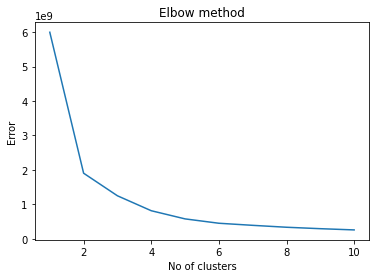

In [0]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x.round())
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

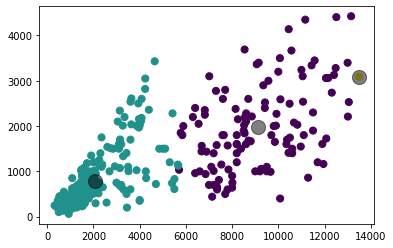

In [0]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [0]:
df['clusters']=y_kmeans3

In [0]:
df.to_csv('./data/step3_output.csv',index=False)



# Step 4. Pre-processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [0]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.listdir()

['.config',
 'step2_output.csv',
 'models',
 'data',
 'content',
 'figures',
 'sample_data']

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [0]:
file="./data/step3_output.csv"


df=pd.read_csv(file)
df.head(3)
df.shape

(330, 26)

## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

In [0]:
df=pd.concat([df,pd.get_dummies(df['state'])],axis=1).drop(['state'],axis=1)
print(df.shape)
df.head()

(330, 60)


,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   summit_elev        330 non-null    int64  
 2   vertical_drop      330 non-null    int64  
 3   trams              330 non-null    int64  
 4   fastEight          330 non-null    float64
 5   fastSixes          330 non-null    int64  
 6   fastQuads          330 non-null    int64  
 7   quad               330 non-null    int64  
 8   triple             330 non-null    int64  
 9   double             330 non-null    int64  
 10  surface            330 non-null    int64  
 11  total_chairs       330 non-null    int64  
 12  Runs               330 non-null    float64
 13  TerrainParks       330 non-null    float64
 14  LongestRun_mi      330 non-null    float64
 15  SkiableTerrain_ac  330 non-null    float64
 16  Snow Making_ac     330 non

## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [0]:
#scale data

from sklearn import preprocessing
x=df.drop(['Name','AdultWeekend'],axis=1)
y=df.AdultWeekend

scalar=preprocessing.StandardScaler().fit(x)
X_scaled=scalar.transform(x)

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [0]:
from sklearn.model_selection import train_test_split
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

**<font color='teal'> To complete this step you upload this notebook to your github repo and share the url with your mentor.  </font>**

# Step 5. Modeling

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone. This gives you the opportunity to practice the code you wrote to solve the questions in step 4. As I combined the steps into one single notebook, I have removed the steps from the step 5 of the notebook which were repeated in the step 4 already.
 

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model on your training dataset.</font>**

#### Model 1

In [0]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

In [0]:
y_pred = model.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed.

In [0]:
explained_variance_score(y_test, y_pred)

0.941389063864438

In [0]:
mean_absolute_error(y_test, y_pred)

2.3627686152986464e-14

**<font color='teal'> Print the intercept value from the linear model. </font>**

In [0]:
lm.intercept_

64.11137036870056

In [0]:
len(lm.coef_)

58

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for `AdultWeekend` resulting value. Also, because we took the time to scale our x values in the training data we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [0]:
coeff_df = pd.DataFrame(abs(lm.coef_), x.columns, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
total_chairs,3.055673e+13
fastQuads,1.158412e+13
surface,1.085345e+13
double,9.564467e+12
triple,8.532161e+12
quad,6.915001e+12
New York,3.989009e+12
Michigan,3.764541e+12
fastSixes,3.434119e+12
Colorado,3.316779e+12


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

#### Model 2

In [0]:
file="./data/step3_output.csv"
df=pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   state              330 non-null    object 
 2   summit_elev        330 non-null    int64  
 3   vertical_drop      330 non-null    int64  
 4   trams              330 non-null    int64  
 5   fastEight          330 non-null    float64
 6   fastSixes          330 non-null    int64  
 7   fastQuads          330 non-null    int64  
 8   quad               330 non-null    int64  
 9   triple             330 non-null    int64  
 10  double             330 non-null    int64  
 11  surface            330 non-null    int64  
 12  total_chairs       330 non-null    int64  
 13  Runs               330 non-null    float64
 14  TerrainParks       330 non-null    float64
 15  LongestRun_mi      330 non-null    float64
 16  SkiableTerrain_ac  330 non

In [0]:
file="./data/step3_output.csv"
df=pd.read_csv(file)
X=df.drop(['Name','AdultWeekend','state'], axis=1)
y=df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(explained_variance_score(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

0.9339850010425123


5.2261313918381544

In [0]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
AdultWeekday,20.134098
averageSnowfall,1.776036
vertical_drop,1.599191
quad,1.474180
triple,1.348792
Runs,1.213963
surface,1.182899
daysOpenLastYear,1.144658
summit_elev,1.045311
fastQuads,0.690639


**<font color='teal'> When reviewing our new model coefficients we see `summit_elev` is now in the number two spot, this also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [0]:
file="./data/step3_output.csv"
df=pd.read_csv(file)

X=df.drop(['Name','AdultWeekend','clusters','state','summit_elev'], axis=1)

y=df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(explained_variance_score(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

0.9243057470047056


5.538078961917419

In [0]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
AdultWeekday,20.082559
averageSnowfall,2.180381
quad,1.554804
triple,1.330670
Runs,1.307364
surface,1.215124
vertical_drop,1.110726
daysOpenLastYear,0.967384
fastQuads,0.770725
total_chairs,0.701596


**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell and you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0.928 | 5.35 |-|
| Model 2. | 0.922 | 5.54 |'state'|
| Model 3. | 0.924 | 5.53 |'state','summit_elev','base_elev'|

Model Selection: